# Importing packages

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout, RNN
%matplotlib inline


In [ ]:
%matplotlib inline

# Reading the dataset

In [4]:
data = pd.read_csv("covid_19_india.csv")

In [5]:
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


# Shape

In [6]:
data.shape

(18110, 9)

# Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


# Drop

Droping and renaming several columns

In [8]:
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(columns=['ConfirmedIndianNational','ConfirmedForeignNational','Time'],inplace=True)
data.rename(columns={'State/UnionTerritory':'State','Confirmed':'Cases'},inplace=True)

# Date time conversion

Converting date from object to datetime

In [9]:
data['Date']= pd.to_datetime(data['Date'])

In [10]:
data.tail(50)

,Date,State,Cured,Deaths,Cases
18060,2021-08-10,Meghalaya,63450,1174,69358
18061,2021-08-10,Mizoram,32854,169,45457
18062,2021-08-10,Nagaland,26727,585,28709
18063,2021-08-10,Odisha,971391,6501,987956
18064,2021-08-10,Puducherry,119031,1800,121665
18065,2021-08-10,Punjab,582753,16320,599514
18066,2021-08-10,Rajasthan,944670,8954,953840
18067,2021-08-10,Sikkim,24822,355,27908
18068,2021-08-10,Tamil Nadu,2522470,34340,2577237
18069,2021-08-10,Telangana,637789,3828,649859


# Making Report

In [11]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
report = ProfileReport(data)
report.to_file(output_file='report.html')

Displaying report as HTML file

In [12]:
report

NameError: name 'report' is not defined

# Group

In [13]:
x = data.groupby(data.columns[0]).sum().diff()

In [14]:
x

,Cured,Deaths,Cases
Date,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,1.0
2020-02-02,0.0,0.0,1.0
2020-02-03,0.0,0.0,0.0
...,...,...,...
2021-08-07,40017.0,617.0,38628.0
2021-08-08,43910.0,491.0,39070.0
2021-08-09,39686.0,447.0,35499.0


# Replace NAN

In [15]:
x.fillna(method='ffill',inplace=True)
x

,Cured,Deaths,Cases
Date,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,1.0
2020-02-02,0.0,0.0,1.0
2020-02-03,0.0,0.0,0.0
...,...,...,...
2021-08-07,40017.0,617.0,38628.0
2021-08-08,43910.0,491.0,39070.0
2021-08-09,39686.0,447.0,35499.0



# Plotting time series of 3 Variables.


<AxesSubplot:xlabel='Date'>

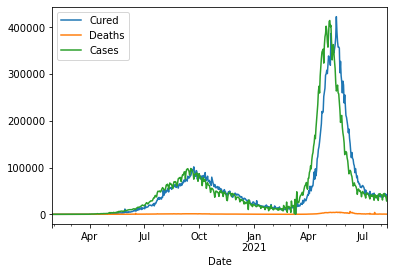

In [16]:
x.plot()

# Resampling number of cases by Monthly Data

In [17]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b')


Text(0, 0.5, 'cases')

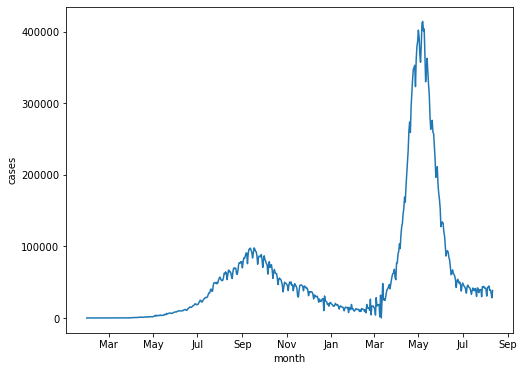

In [18]:
from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_formatter(myFmt)

ax.plot(x.index, x.Cases);
#monthly cases 

ax.set_xlabel('month')
ax.set_ylabel('cases')


# Resampling number of cases by Weekly Data

In [19]:
y = x.groupby(pd.Grouper(freq='W'))

In [20]:
weekly = data.resample('W', on='Date')['Cases'].sum()

In [21]:
weekly

Date
2020-02-02            7
2020-02-09           21
2020-02-16           21
2020-02-23           21
2020-03-01           21
                ...    
2021-07-18    216913414
2021-07-25    218789730
2021-08-01    220707093
2021-08-08    222690308
2021-08-15     96004623
Freq: W-SUN, Name: Cases, Length: 81, dtype: int64

<AxesSubplot:xlabel='Date'>

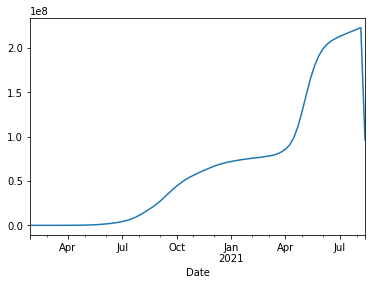

In [22]:
weekly.plot()

# Setting up helper functions for forecasting - get_n_last_days, plot_n_last_days

In [23]:
def LastNdays(days):
    df = x.tail(days)
    return df
def plot(df):
    px.line(df,x=df.index,y=df.Cases).show()

In [24]:
df = LastNdays(200)
plot(df)

NameError: name 'px' is not defined

In [25]:
def get_train_test_data(df, series_name, series_days, input_hours,test_hours, sample_gap=3):

    # reducing our forecast series to last n days
    forecast_series = LastNdays(series_days).values

    # training data is remaining days until amount of test_hours
    train = forecast_series[:-test_hours]
    # test data is the remaining test_hours
    test = forecast_series[-test_hours:]

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap.
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap):
        # each training sample is of length input hours
        train_X.append(train[i:i+input_hours])
        # each y is just the next step after training sample
        train_y.append(train[i+input_hours])

    # format our new training set to keras format
    train_X = get_keras_format_series(train_X)
    # make sure y is an array to work properly with keras
    train_y = np.array(train_y)

    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours]
    test_y = test[input_hours:]  # test_y is remaining values from test set

    return train_X, test_X_init, train_y, test_y


def get_keras_format_series(series):

    series = np.array(series)
    # converting to 3d
    return series.reshape(series.shape[0], series.shape[1], 1)


In [26]:
series_days = 600
input_days = 5
test_days = 10

train_X, test_X_init, train_y, test_y = get_train_test_data(x, 'Cases', series_days, input_days, test_days)


ValueError: cannot reshape array of size 2730 into shape (182,5,1)

In [ ]:
def get_n_last_days(df, series_name, n_days):
    return df[series_name][-(n_days):]

In [ ]:
def get_keras_format_series(series):

    series = np.array(series)
    # converting to 3d
    return series.reshape(series.shape[0], series.shape[1], 1)


def get_train_test_data(df, series_name, series_days, input_hours,
                        test_hours, sample_gap=3):

    # reducing our forecast series to last n days
    forecast_series = get_n_last_days(df, series_name, series_days).values

    # training data is remaining days until amount of test_hours
    train = forecast_series[:-test_hours]
    # test data is the remaining test_hours
    test = forecast_series[-test_hours:]

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap.
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap):
        # each training sample is of length input hours
        train_X.append(train[i:i+input_hours])
        # each y is just the next step after training sample
        train_y.append(train[i+input_hours])

    # format our new training set to keras format
    train_X = get_keras_format_series(train_X)
    # make sure y is an array to work properly with keras
    train_y = np.array(train_y)

    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours]
    test_y = test[input_hours:]  # test_y is remaining values from test set

    return train_X, test_X_init, train_y, test_y


In [ ]:
series_days = 600
input_days = 5
test_days = 10

train_X, test_X_init, train_y, test_y = get_train_test_data(x, 'Cases', series_days,
                                                            input_days, test_days)


In [ ]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))


In [ ]:
def fit_LSTM(X_train, y_train, epochs):
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # Adding a second LSTM layer nd some Dropout regularisation
    regressor.add(LSTM(units = 45, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 45, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 45))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    regressor.compile(loss='mean_squared_error', optimizer='adam')
    regressor.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=1)


In [ ]:
model1 = fit_LSTM(train_X, train_y, epochs=100)